# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Julia Fangman
#### Github Link: https://github.com/julia-fangman/article-summarizer-final 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Prereqs Installed:

In [58]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list
print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packa

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [59]:
import requests

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content
    html_content = response.text
    
    # Write the HTML content to a file
    with open("pickleball_article.html", "w", encoding="utf-8") as file:
        file.write(html_content)
    print("HTML content saved to pickleball_article.html")
else:
    print("Failed to fetch the article. Status code:", response.status_code)


HTML content saved to pickleball_article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [60]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import re

# Read the HTML content from the file
with open("pickleball_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the HTML
article_text = soup.get_text()

# Remove extra whitespaces and newlines
article_text = re.sub(r'\s+', ' ', article_text)

# Perform sentiment analysis
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

print("Sentiment Polarity Score:", polarity_score)

# Count the number of sentences
sentences = blob.sentences
num_sentences = len(sentences)
print("Number of Sentences in the Article:", num_sentences)


Sentiment Polarity Score: 0.37547029528736797
Number of Sentences in the Article: 181


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [61]:
import spacy
from collections import Counter

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Tokenize the text and count the frequencies
token_counter = Counter([token.text.lower() for token in doc if not token.is_stop and not token.is_punct])

# Get the 5 most common tokens
common_tokens = token_counter.most_common(5)

print("Top 5 Most Frequent Tokens:")
for token, frequency in common_tokens:
    print(f"Token: {token}, Frequency: {frequency}")

# Print all tokens and their frequencies
print("\nAll Tokens and Their Frequencies:")
for token, frequency in token_counter.items():
    print(f"Token: {token}, Frequency: {frequency}")


Top 5 Most Frequent Tokens:
Token: best, Frequency: 120
Token: pickleball, Frequency: 70
Token: review, Frequency: 39
Token: health, Frequency: 36
Token: hearing, Frequency: 29

All Tokens and Their Frequencies:
Token:  , Frequency: 1
Token: pickleball, Frequency: 70
Token: complete, Frequency: 3
Token: guide, Frequency: 4
Token: forbes, Frequency: 16
Token: health, Frequency: 36
Token: select, Frequency: 1
Token: region, Frequency: 1
Token: united, Frequency: 2
Token: states, Frequency: 1
Token: kingdom, Frequency: 1
Token: germany, Frequency: 1
Token: india, Frequency: 1
Token: australia, Frequency: 1
Token: italy, Frequency: 1
Token: canada, Frequency: 1
Token: mind, Frequency: 3
Token: online, Frequency: 18
Token: therapy, Frequency: 12
Token: best, Frequency: 120
Token: affordable, Frequency: 2
Token: takes, Frequency: 1
Token: insurance, Frequency: 2
Token: anxiety, Frequency: 4
Token: depression, Frequency: 3
Token: adhd, Frequency: 1
Token: couples, Frequency: 1
Token: marriage

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [62]:
import spacy
from collections import Counter

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Extract lemmas and count their frequencies
lemma_counter = Counter([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

# Get the 5 most common lemmas
common_lemmas = lemma_counter.most_common(5)

print("Top 5 Most Frequent Lemmas:")
for lemma, frequency in common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {frequency}")

# Print all lemmas and their frequencies
print("\nAll Lemmas and Their Frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"Lemma: {lemma}, Frequency: {frequency}")


Top 5 Most Frequent Lemmas:
Lemma: best, Frequency: 110
Lemma: pickleball, Frequency: 70
Lemma: review, Frequency: 42
Lemma: health, Frequency: 36
Lemma: aids, Frequency: 25

All Lemmas and Their Frequencies:
Lemma:  , Frequency: 1
Lemma: pickleball, Frequency: 70
Lemma: complete, Frequency: 3
Lemma: guide, Frequency: 5
Lemma: forbes, Frequency: 16
Lemma: health, Frequency: 36
Lemma: select, Frequency: 1
Lemma: region, Frequency: 1
Lemma: united, Frequency: 2
Lemma: states, Frequency: 1
Lemma: kingdom, Frequency: 1
Lemma: germany, Frequency: 1
Lemma: india, Frequency: 1
Lemma: australia, Frequency: 1
Lemma: italy, Frequency: 1
Lemma: canada, Frequency: 1
Lemma: mind, Frequency: 3
Lemma: online, Frequency: 18
Lemma: therapy, Frequency: 12
Lemma: best, Frequency: 110
Lemma: affordable, Frequency: 2
Lemma: take, Frequency: 2
Lemma: insurance, Frequency: 2
Lemma: anxiety, Frequency: 4
Lemma: depression, Frequency: 3
Lemma: adhd, Frequency: 1
Lemma: couples, Frequency: 1
Lemma: marriage, Fr

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

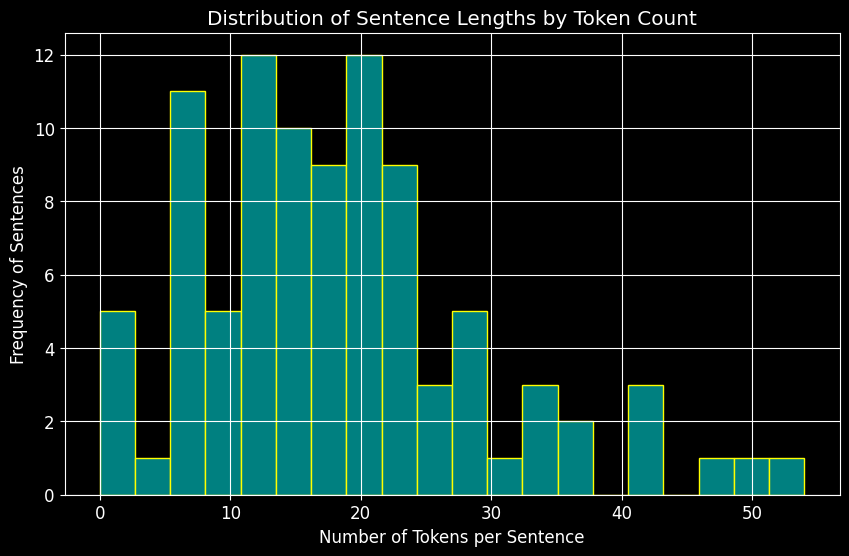

In [63]:
import requests
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt

# Set style and font properties for the plot
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 12})

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs])

# Process the text with spaCy
doc = nlp(article_content)

# List to hold scores (number of tokens in each sentence)
token_counts = []

# Tokenize into sentences and calculate token count for each
for sent in doc.sents:
    num_tokens = len([token for token in sent if token.is_alpha])
    token_counts.append(num_tokens)

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=20, color='teal', edgecolor='yellow')  # Custom colors
plt.title('Distribution of Sentence Lengths by Token Count')
plt.xlabel('Number of Tokens per Sentence')
plt.ylabel('Frequency of Sentences')
plt.grid(True)
plt.show()



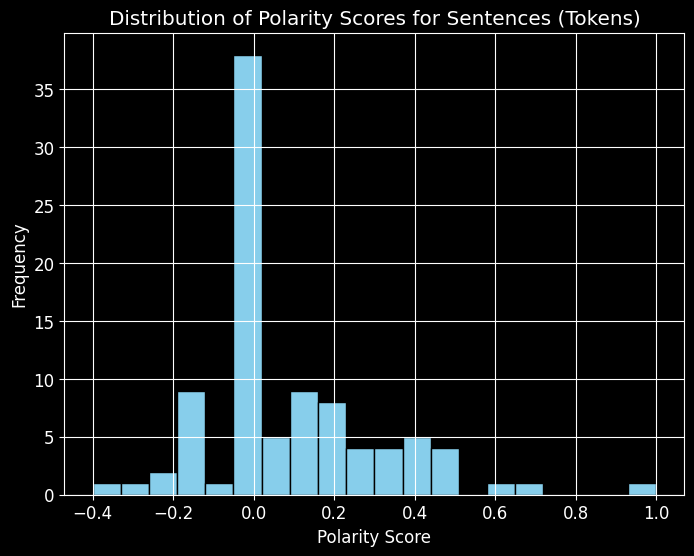

In [64]:
import requests
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Calculate polarity score for each sentence token
sentence_scores = [TextBlob(sent.text).sentiment.polarity for sent in doc.sents]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores for Sentences (Tokens)')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [65]:
# The most common scores seem to be between 0.00 and 0.4. 

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

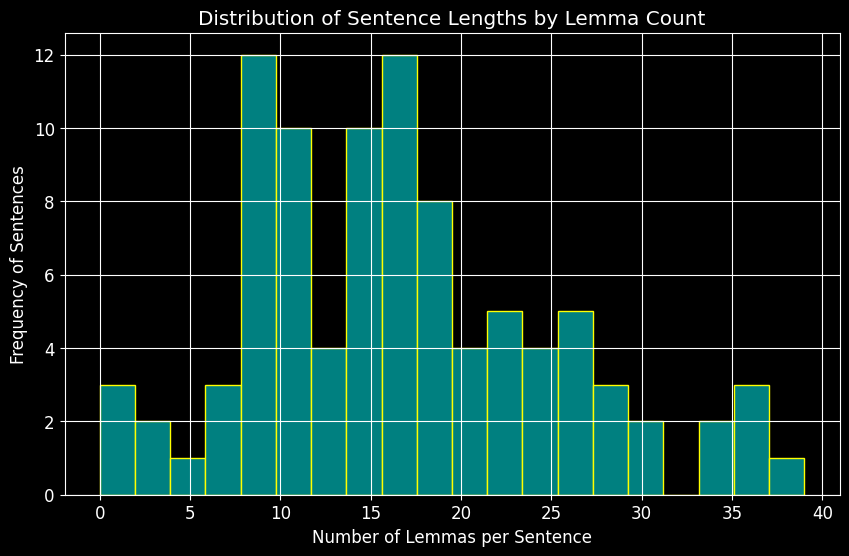

In [66]:
import requests
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt

# Set style and font properties for the plot
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 12})

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs])

# Process the text with spaCy
doc = nlp(article_content)

# List to hold scores (number of lemmas in each sentence)
lemma_counts = []

# Tokenize into sentences and calculate lemma count for each
for sent in doc.sents:
    num_lemmas = len(set([token.lemma_ for token in sent if token.is_alpha]))
    lemma_counts.append(num_lemmas)

# Plotting the histogram of lemma counts
plt.figure(figsize=(10, 6))
plt.hist(lemma_counts, bins=20, color='teal', edgecolor='yellow')  # Custom colors
plt.title('Distribution of Sentence Lengths by Lemma Count')
plt.xlabel('Number of Lemmas per Sentence')
plt.ylabel('Frequency of Sentences')
plt.grid(True)
plt.show()


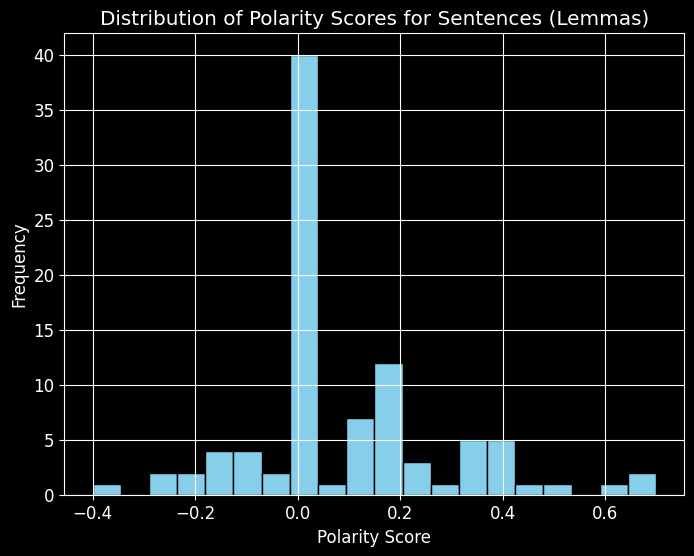

In [67]:
import requests
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Calculate polarity score for each sentence lemma
sentence_scores = [TextBlob(sent.lemma_).sentiment.polarity for sent in doc.sents]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores for Sentences (Lemmas)')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [68]:
# The highest scores for the lemmas are between 0.00 and 0.2. 

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.3
* Cutoff Score (lemmas): 0.2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [69]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Cutoff score identified in question 7 for tokens
cutoff_score_tokens = 0.3

# List to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score for the sentence based on tokens
    token_score = TextBlob(sent.text).sentiment.polarity
    # If the score is greater than the cutoff score, add the sentence to the summary
    if token_score > cutoff_score_tokens:
        summary_sentences.append(sent.text.strip())

# Ensure the summary consists of exactly 9 sentences
if len(summary_sentences) > 9:
    summary_sentences = summary_sentences[:9]

# Print the summary with numbering
print("Summary:")
for i, sentence in enumerate(summary_sentences, 1):
    print(f"{i}. {sentence}")



Summary:
1. To help support our reporting work, and to continue our ability to provide this content for free to our readers, we receive compensation from the companies that advertise on the Forbes Health site.
2. This site does not include all companies or products available within the market.
3. “​​Plus, the health benefits are not only the exercise, but also the joy it brings.”
Read on to learn more about the hottest sport on a court.
4. “Well, frankly, the early kids got pushed out,” laughed McCallum in his Pickleball Channel interview.
5. There was no conversation like that—it was strictly for our own pleasure.”
6. “Due to the pickleball court being a quarter of the size of a tennis court, it’s easy to create a court in your driveway, in a parking lot or within a gym space, so many people were introduced to the sport during those unprecedented times playing with their family of four in the driveway.”
7. Many players describe it as a great workout that doesn’t feel like a workout.
8

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [70]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Cutoff score identified in question 7 for tokens
cutoff_score_tokens = 0.3

# List to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score for the sentence based on tokens
    token_score = TextBlob(sent.text).sentiment.polarity
    # If the score is greater than the cutoff score, add the sentence to the summary
    if token_score > cutoff_score_tokens:
        summary_sentences.append(sent.text.strip())

# Ensure the summary consists of exactly 9 sentences
if len(summary_sentences) > 9:
    summary_sentences = summary_sentences[:9]

# Print the summary with numbering
print("Summary:")
for i, sentence in enumerate(summary_sentences, 1):
    print(f"{i}. {sentence}")

# Calculate polarity score for the summary
summary_blob = TextBlob(" ".join(summary_sentences))
summary_polarity_score = summary_blob.sentiment.polarity

# Print the polarity score of the summary
print("\nPolarity Score of the Summary (based on token scores):", summary_polarity_score)

# Print the number of sentences in the summarized article
print("Number of Sentences in the Summarized Article:", len(summary_sentences))


Summary:
1. To help support our reporting work, and to continue our ability to provide this content for free to our readers, we receive compensation from the companies that advertise on the Forbes Health site.
2. This site does not include all companies or products available within the market.
3. “​​Plus, the health benefits are not only the exercise, but also the joy it brings.”
Read on to learn more about the hottest sport on a court.
4. “Well, frankly, the early kids got pushed out,” laughed McCallum in his Pickleball Channel interview.
5. There was no conversation like that—it was strictly for our own pleasure.”
6. “Due to the pickleball court being a quarter of the size of a tennis court, it’s easy to create a court in your driveway, in a parking lot or within a gym space, so many people were introduced to the sport during those unprecedented times playing with their family of four in the driveway.”
7. Many players describe it as a great workout that doesn’t feel like a workout.
8

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [71]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Cutoff score identified in question 8 for lemmas
cutoff_score_lemmas = 0.2

# List to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score for the sentence based on lemmas
    lemma_score = TextBlob(sent.text).sentiment.polarity
    # If the score is greater than the cutoff score and the number of sentences is less than 9, add the sentence to the summary
    if lemma_score > cutoff_score_lemmas and len(summary_sentences) < 9:
        summary_sentences.append(sent.text.strip())

# Print the summary if it contains exactly 9 sentences
if len(summary_sentences) == 9:
    print("Summary:")
    print('\n'.join(summary_sentences))
else:
    print("Unable to generate a summary with exactly 9 sentences.")


Summary:
To help support our reporting work, and to continue our ability to provide this content for free to our readers, we receive compensation from the companies that advertise on the Forbes Health site.
This site does not include all companies or products available within the market.
In fact, this badminton/tennis/Ping-Pong mashup volleyed itself into the top spot for fastest growing sport in the U.S. for the second year in a row[1]Sports & Fitness Industry Association 2022 Sports, Fitness, and Leisure Activities Topline Participation Report.
“​​Plus, the health benefits are not only the exercise, but also the joy it brings.”
Read on to learn more about the hottest sport on a court.
“Well, frankly, the early kids got pushed out,” laughed McCallum in his Pickleball Channel interview.
There was no conversation like that—it was strictly for our own pleasure.”
By 1967, the first permanent pickleball court was constructed, and in 1972, the first corporation was formed to protect the cre

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [72]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Cutoff score identified in question 8 for lemmas
cutoff_score_lemmas = 0.2

# List to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score for the sentence based on lemmas
    lemma_score = TextBlob(sent.text).sentiment.polarity
    # If the score is greater than the cutoff score and the number of sentences is less than 9, add the sentence to the summary
    if lemma_score > cutoff_score_lemmas and len(summary_sentences) < 9:
        summary_sentences.append(sent.text.strip())

# Print the summary if it contains exactly 9 sentences
if len(summary_sentences) == 9:
    print("Summary:")
    print('\n'.join(summary_sentences))

    # Calculate polarity score of the summary
    summary_polarity_scores = [TextBlob(sentence).sentiment.polarity for sentence in summary_sentences]
    average_polarity_score = sum(summary_polarity_scores) / len(summary_polarity_scores)
    print("\nPolarity Score of the Summary:", average_polarity_score)

    # Print the number of sentences in the summarized article
    print("Number of Sentences in the Summarized Article:", len(summary_sentences))
else:
    print("Unable to generate a summary with exactly 9 sentences.")


Summary:
To help support our reporting work, and to continue our ability to provide this content for free to our readers, we receive compensation from the companies that advertise on the Forbes Health site.
This site does not include all companies or products available within the market.
In fact, this badminton/tennis/Ping-Pong mashup volleyed itself into the top spot for fastest growing sport in the U.S. for the second year in a row[1]Sports & Fitness Industry Association 2022 Sports, Fitness, and Leisure Activities Topline Participation Report.
“​​Plus, the health benefits are not only the exercise, but also the joy it brings.”
Read on to learn more about the hottest sport on a court.
“Well, frankly, the early kids got pushed out,” laughed McCallum in his Pickleball Channel interview.
There was no conversation like that—it was strictly for our own pleasure.”
By 1967, the first permanent pickleball court was constructed, and in 1972, the first corporation was formed to protect the cre

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  

The polarity scores of the summary, both based on token and lemma analysis, provide insights into the overall sentiment portrayed in the condensed version of the article. While the token-based score of 0.4273 suggests a slightly more positive sentiment, the lemma-based score of 0.3697 may offer a nuanced perspective due to lemmatization. Comparing these scores to the initial article's polarity score of 0.375 reveals variations in sentiment analysis methodologies and highlights the importance of considering different linguistic features when assessing sentiment. These scores collectively aid in understanding the emotional tone conveyed by the summarized content compared to the original article.




13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Personally, I lean towards lemma-based analysis as it simplifies words to their core meanings, potentially offering a more accurate sentiment portrayal by eliminating grammatical variations. However, it's crucial to acknowledge that neither approach is flawless, and a combination of both may provide the most comprehensive understanding of an article's sentiment. 


I wanted to practice & create my own summary (one that actually made sense) with hand-picked sentences! 

In [73]:
import requests
from bs4 import BeautifulSoup

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text.strip() for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Define the sentences to extract
sentences_to_extract = [
    "Pickleball now has 4.8 million participants nationwide and a 39.3% growth rate over the last two years, according to the Sports and Fitness Industry Association (SFIA) 2022 Sports, Fitness and Leisure Activities Topline Participation Report.",
    "“It’s social and extremely fun and easy for the whole family to play—everyone from a young kid to a grandma,” says professional pickleball player Parris Todd, a former competitive tennis player who switched to pickleball during the pandemic and hasn’t looked back. “​​Plus, the health benefits are not only the exercise, but also the joy it brings.”",
    "Pickleball was created in 1965 in Bainbridge Island, Washington, by Joel Pritchard, Bill Bell and Barney McCallum. The three neighbors initially came up with the concept—using some old Ping-Pong paddles and a perforated ball on a badminton court—as a game to keep their bored kids busy on a rainy day. By 1967, the first permanent pickleball court was constructed, and in 1972, the first corporation was formed to protect the creation of pickleball. By 1984, the USA Pickleball Association governed the sport.",
    "“During the pandemic, many Americans were seeking ways to stay healthy and active near their homes,” says Laura Gainor, director of media relations for USA Pickleball. “Due to the pickleball court being a quarter of the size of a tennis court, it’s easy to create a court in your driveway, in a parking lot or within a gym space, so many people were introduced to the sport during those unprecedented times playing with their family of four in the driveway.”",
    "There are many health benefits of playing pickleball, not least of which is that it’s a quick picker-upper. Not only is the “fun factor” evident, but a recent study of 153 older adults in the journal Leisure Studies found playing pickleball to be associated with lower levels of depression[2]. Other research shows it may also improve cognitive performance. On a physical level, pickleball can support better hand-eye coordination (which is also important for daily tasks like driving and eating). Additionally, studies indicate that playing pickleball increases agility and coordination, as well as muscle strength and function.",
    "There’s no doubt pickleball is here to stay. Approximately 70 countries across the globe have joined the International Federation of Pickleball, and there’s even talk of trying to add it to the 2028 Olympic games as a demonstration sport."
]

# List to store the extracted sentences
extracted_sentences = []

# Iterate through each paragraph to find the sentences to extract
for sentence in sentences_to_extract:
    # If the sentence is found in the article content, add it to the extracted sentences list
    if sentence in article_content:
        extracted_sentences.append(sentence)

# Print the extracted sentences
print('\n'.join(extracted_sentences))


Pickleball now has 4.8 million participants nationwide and a 39.3% growth rate over the last two years, according to the Sports and Fitness Industry Association (SFIA) 2022 Sports, Fitness and Leisure Activities Topline Participation Report.
“It’s social and extremely fun and easy for the whole family to play—everyone from a young kid to a grandma,” says professional pickleball player Parris Todd, a former competitive tennis player who switched to pickleball during the pandemic and hasn’t looked back. “​​Plus, the health benefits are not only the exercise, but also the joy it brings.”
“During the pandemic, many Americans were seeking ways to stay healthy and active near their homes,” says Laura Gainor, director of media relations for USA Pickleball. “Due to the pickleball court being a quarter of the size of a tennis court, it’s easy to create a court in your driveway, in a parking lot or within a gym space, so many people were introduced to the sport during those unprecedented times p